# Исследования рынка общепита в Москве для принятия решения об открытии нового заведения

Заказчик решил открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами заказчик решил обратиться к инвесторам. Их интересует текущее положение дел на рынке.

**Цель исследования** - анализ рынка общепита в Москве для принятия решения об открытии нового заведения.

У нас в распоряжении есть открытые данные о заведениях общественного питания в Москве.

**Описание данных**

Таблица rest_data:

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

## Изучение общей информации о данных

Загрузим данные о заведениях общественного питания Москвы и изучим общую информацию. 

In [1]:
#импортируем необходимые в рамках анализа библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
#откроем файл с данными
df = pd.read_csv('')

In [3]:
#изучим общую информацию
display(df.columns, df.head(), df.describe())
print('*' * 50)
df.info()

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
#проверим, нет ли необычных значений
for column in ['chain', 'object_type']:
    print(df[column].unique())

['нет' 'да']
['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


In [5]:
#проверка на наличие дубликатов
df.duplicated().sum()

0

В результате ознакомления с данными, можно сделать следующие выводы:

- Для каждой колонки выбран соответствубщий тип данных;
- В данных отсутствуют пропущенные значения;
- В датасете отсутствуют явные дубликаты.

Однако, столбец с названием заведений содержит информацию с разными регистрами, на разных языках и с дополнительным указанием категории заведения в некоторых случаях. Это может стать причиной для появления неявных дубликатов.

In [6]:
#избавимся от разных регистров, а также очистим названия от вида заведения
df['object_name_new'] = df['object_name'].str.lower()\
                                    .str.replace('кафе|ресторан|столовая|закусочная|кафетерий|буфет|бар|магазин', '')
df.head()

,id,object_name,chain,object_type,address,number,object_name_new
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,«академия»
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,«вишневая метель»


Таким образом, мы получили очищенный датасет. Можем приступать к анализу данных.

In [7]:
#формируем срез по датасету без учет id
df_dub = df.loc[:, 'object_name':'number']
#проверяем те заведения, где кол-во посадочных мест = 0
display(df_dub.query('number == 0'))
#удалять эти заведения не  будем, т.к. возможен такой формат
#проверяем число дублей
print(df_dub.duplicated().sum())
#выводим дубли на экран для проверки
df_dub = df_dub[df_dub.duplicated()].sort_values(by='object_name')
df_dub.head()

,object_name,chain,object_type,address,number
137,Пекарня & Донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,Суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0
...,...,...,...,...,...
15334,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Дубравная улица, дом 34/29",0
15335,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Пятницкое шоссе, дом 3",0
15336,Готовые блюда Милти,да,предприятие быстрого обслуживания,"город Москва, Ореховый бульвар, дом 22А",0
15337,Милти,да,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0


82


,object_name,chain,object_type,address,number
13858,LALTRO BOSCO,нет,ресторан,"город Москва, улица Петровка, дом 10",145
5059,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
5069,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
14844,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
5762,Алекс,нет,кафе,"город Москва, Тихорецкий бульвар, владение 1, ...",45


Получается, что к числу дублей попадают как явные дубли, так и заведения, схожие по названию, но отличающиеся в адресе/кол-ве мест,  также сетевые заведения. Поскольку таких заведений незначительное кол-во (0.5% от всех заведений), можем пренебречь этой погрешностью и не удалять их,посколько они не несут статистической значимости и не повлияют на результаты исследования

## Анализ данных

### Соотношение видов объектов общественного питания по количеству

,object_type,total,% of total
3,кафе,6099,39.691527
8,столовая,2587,16.835871
7,ресторан,2285,14.870493
6,предприятие быстрого обслуживания,1923,12.514643
0,бар,856,5.570741
1,буфет,585,3.807107
4,кафетерий,398,2.590134
2,закусочная,360,2.342835
5,магазин (отдел кулинарии),273,1.776650


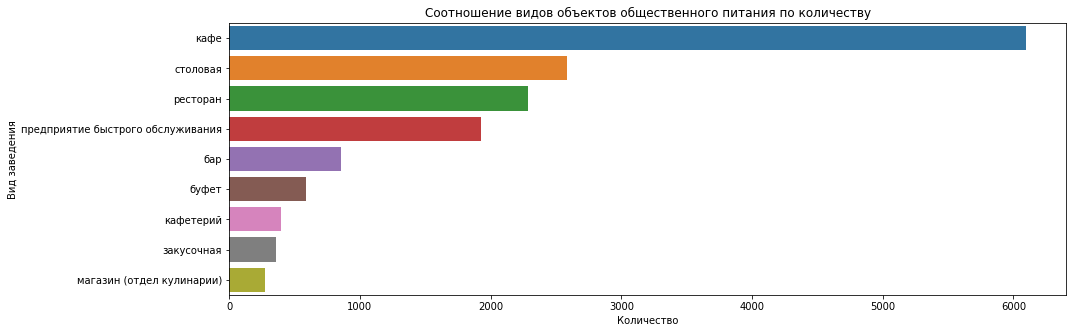

In [8]:
df_ratio_object_type = df.groupby('object_type').agg({'id':'count'}).reset_index()
df_ratio_object_type.columns = ['object_type', 'total']
df_ratio_object_type['% of total'] = df_ratio_object_type['total'] / df_ratio_object_type['total'].sum() * 100
df_ratio_object_type = df_ratio_object_type.sort_values(by = 'total', ascending = False)
display(df_ratio_object_type)

plt.figure(figsize=(15, 5)) 
sns.barplot(x='total', y='object_type', data=df_ratio_object_type) 
plt.title('Cоотношение видов объектов общественного питания по количеству')
plt.xlabel('Количество')    
plt.ylabel('Вид заведения');

По графику видно, что наиболее распространенный вид объектов общественного питания - кафе (почти 40%). Данная ситуация легко объясняется: 

- благодаря своей универсальности кафе предлагают своим клиентам широкий спектр блюд, закусок и напитков, обеспечивая постоянный поток клиентов;
- как правило, для организации кафе требуются меньшие производственные мощности, соответственно, меньшие затраты инвесторов на аренду помещения, з/п работникам и т.д.

Также к числу наиболее распространенных видов объектов общественного питания можно отнести столовые (17%), рестораны (15%) и предприятия быстрого обслуживания (13%).

### Соотношение сетевых и несетевых заведений по количеству

,chain,total,% of total
1,нет,12398,80.684628
0,да,2968,19.315372


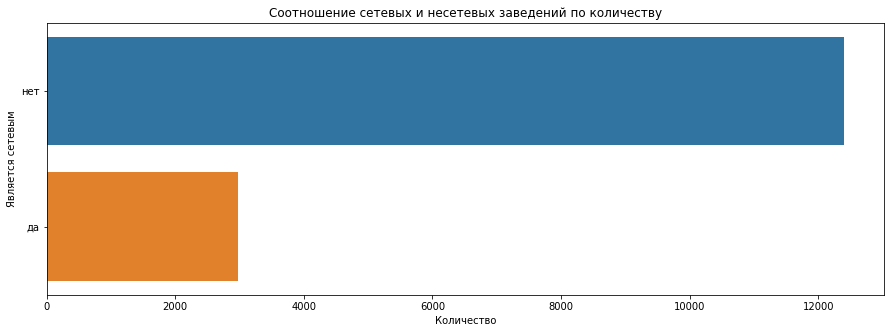

In [9]:
df_ratio_chain = df.groupby('chain').agg({'id':'count'}).reset_index()
df_ratio_chain.columns = ['chain', 'total']
df_ratio_chain['% of total'] = df_ratio_chain['total'] / df_ratio_chain['total'].sum() * 100
df_ratio_chain = df_ratio_chain.sort_values(by = 'total', ascending = False)
display(df_ratio_chain)

plt.figure(figsize=(15, 5)) 
sns.barplot(x='total', y='chain', data=df_ratio_chain) 
plt.title('Cоотношение сетевых и несетевых заведений по количеству')
plt.xlabel('Количество')    
plt.ylabel('Является сетевым');

С точки зрения распространения, наиболее популярны несетевые заведения (81%). На долю сетевых приходится лишь 19%. Скорее всего данная ситуация объясняется преобладающим числом одиночных кафе на рынке общественного питания, которые не предполагают сетевой статус. Тогда к какому виду заведений относятся сетевые?

### Определение вида объекта общественного питания, для которого характерно сетевое распространение

chain,да,нет,total
object_type,,,
кафе,1396,4703,6099
столовая,3,2584,2587
ресторан,544,1741,2285
предприятие быстрого обслуживания,791,1132,1923
бар,37,819,856
буфет,11,574,585
кафетерий,52,346,398
закусочная,56,304,360
магазин (отдел кулинарии),78,195,273


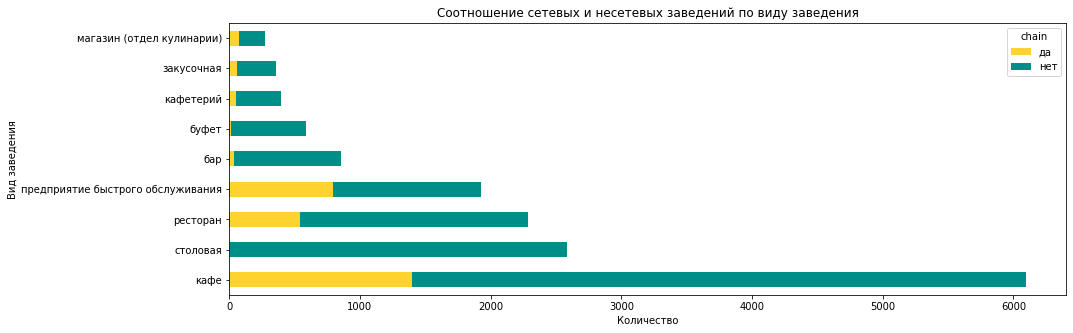

In [10]:
df_ratio_object_chain = df.pivot_table(index='object_type', columns='chain', values='id', aggfunc='nunique')
df_ratio_object_chain['total'] = df_ratio_object_chain['да'] + df_ratio_object_chain['нет']
df_ratio_object_chain = df_ratio_object_chain.sort_values(by='total', ascending=False)
display(df_ratio_object_chain)


df_ratio_object_chain[['да', 'нет']].plot(kind='barh', figsize=(15, 5), stacked=True, color=['#FFD32D', '#008E89'])
plt.title('Cоотношение сетевых и несетевых заведений по виду заведения')
plt.xlabel('Количество')    
plt.ylabel('Вид заведения');

Действительно, большая часть несетевых заведений приходится на кафе. Помимо этого, преимущественно к несетевым относятся столовые, буфеты, бары. 

Если говорить про сетевые заведения, то это могут быть предприятия быстрого обслуживания, рестораны. Однако велика доля и сетевых кафе.

### Определение отличительных черт для сетевых заведений

,id,number
count,724.000000,724.000000
mean,4.099448,60.320759
std,12.625954,56.132763
min,1.000000,0.000000
25%,1.000000,20.000000
50%,1.000000,45.000000
75%,2.000000,83.625000
max,155.000000,356.000000


,кол-во сетей,медианное число заведений,медианное кол-во посадочных мест
группа,,,
мало заведений - мало мест,174,1,10.000000
мало заведений - много мест,464,1,64.083333
много заведений - мало мест,21,12,9.454545
много заведений - много мест,65,10,55.341935


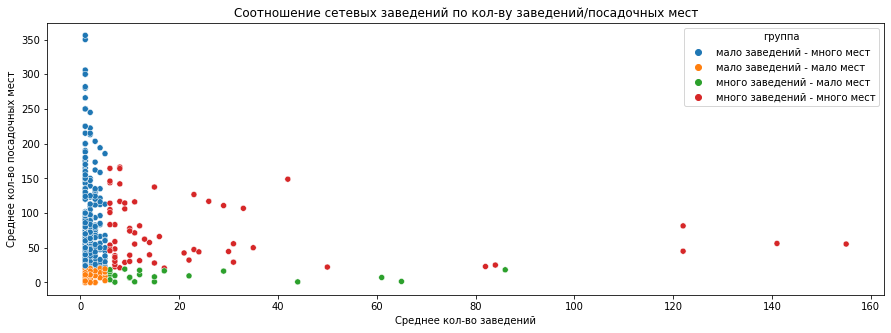

In [11]:
#отберем все сетевые рестораны
df_ratio_number_chain = df.query('chain == "да"')
#для каждой сети посчитаем число заведений и среднее значение посадочных мест
df_ratio_number_chain = df_ratio_number_chain.groupby('object_name').agg({'id':'count', 'number':'mean'})

display(df_ratio_number_chain.describe())

#установим границу много/мало заведений на уровне 5
df_ratio_number_chain['restaurant_group'] = 'мало заведений'
df_ratio_number_chain.loc[df_ratio_number_chain['id'] > 5, 'restaurant_group'] = 'много заведений'
#установим границу много/мало посадочных мест на уровне 20
df_ratio_number_chain['seat_group'] = 'мало мест'
df_ratio_number_chain.loc[df_ratio_number_chain['number'] > 20, 'seat_group'] = 'много мест'
#формируем группы
df_ratio_number_chain['группа'] = df_ratio_number_chain['restaurant_group'].astype(str) + \
                                    ' - ' + \
                                    df_ratio_number_chain['seat_group'].astype(str) 
display(df_ratio_number_chain.reset_index().groupby('группа')\
                                            .agg({'object_name':'nunique', 'id':'median', 'number':'median'})\
                                            .rename(columns={'object_name':'кол-во сетей',
                                                              'id':'медианное число заведений',
                                                              'number':'медианное кол-во посадочных мест'}))

plt.figure(figsize=(15, 5))
sns.scatterplot(data=df_ratio_number_chain, x='id', y='number', hue='группа')
plt.title('Cоотношение сетевых заведений по кол-ву заведений/посадочных мест')
plt.xlabel('Среднее кол-во заведений')    
plt.ylabel('Среднее кол-во посадочных мест');

Как видно из графика, для сетевых заведений характерна следующая ситуация на рынке:
    
    - по количеству заведений в сети преобладают сети с малыми производственными мощностями (кол-во заведений в сети менее 5);
    - по количеству посадочных мест преобладают сети с большим их количеством (вне зависимости от кол-ва заведений в сети).

### Определение среднего количества посадочных мест для каждого вида объекта общественного питания

,object_type,id,number
0,столовая,2587,130.246618
1,ресторан,2285,96.834136
2,буфет,585,51.129915
3,бар,856,43.494159
4,кафе,6099,39.716019
5,предприятие быстрого обслуживания,1923,20.552262
6,кафетерий,398,9.123116
7,закусочная,360,7.608333
8,магазин (отдел кулинарии),273,5.589744


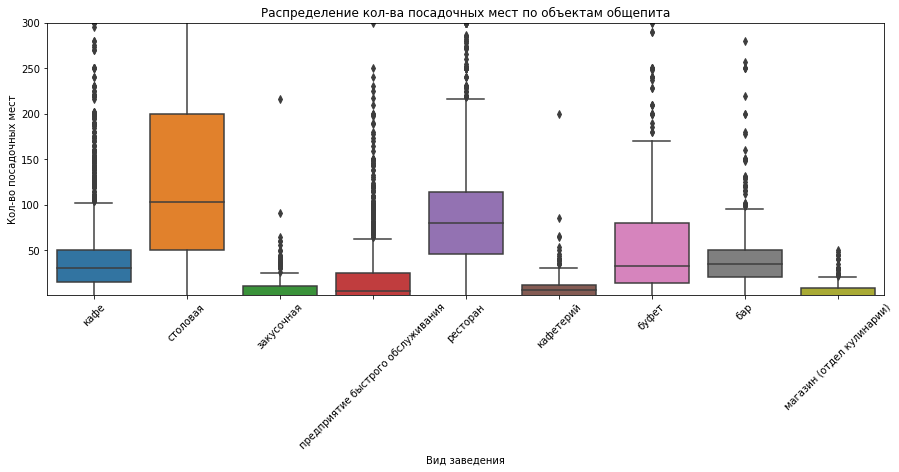

In [12]:
#для каждого вида объекта общественного питания посчитаем среднее значение посадочных мест
df_ratio_number_object = df.groupby('object_type').agg({'id':'count', 'number':'mean'})\
                                                    .sort_values(by='number', ascending=False).reset_index()
display(df_ratio_number_object)

plt.figure(figsize=(15, 5))
sns.boxplot(x='object_type', y='number', data=df)
plt.title('Распределение кол-ва посадочных мест по объектам общепита')
plt.xlabel('Вид заведения')    
plt.ylabel('Кол-во посадочных мест')
plt.xticks (rotation = 45)
plt.ylim (1, 300);

Если сравнивать объекты общественного питания по кол-ву посадочных мест, то лидером по среднему кол-ву являются столовые: в среднем столовые могут одновременно разместить до 130 гостей. 

На второе место вышли рестораны: здесь одновременно может находиться до 96 посетителей.

На третьем месте - буфет со своей способностью разместить 51 гостя.

### Выделение улицы в отдельный столбец

In [13]:
#создадим функцию для удобства выделения улицы из адреса
def get_streetname(cell):
    for add_part in cell.split(','):
        for str_type in ["улица", "проспект", "бульвар", "шоссе", "набережная"]:
            if str_type in add_part:
                return add_part
    return cell.split(',')[1]

In [14]:
df['street'] = df['address'].apply(get_streetname)
df['street'] = df['street'].str.strip()
df.head()

,id,object_name,chain,object_type,address,number,object_name_new,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,«академия»,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,«вишневая метель»,Абрамцевская улица


Получили новый столбец с указанием улицы. Можем приступать к дальнейшему анализу.

### Топ-10 улиц по количеству объектов общественного питания

In [15]:
df_top_streets = df.groupby('street').agg({'id':'count'}).reset_index().rename(columns={'street':'streetname', 'id':'total'})\
                                                            .sort_values(by='total', ascending = False)
display(df_top_streets.head(10))

df_top_streets = df_top_streets.query('streetname != "город Зеленоград"')
df_top_streets.head(10)

,streetname,total
1459,проспект Мира,204
1376,город Зеленоград,194
1022,Профсоюзная улица,183
700,Ленинградский проспект,173
1008,Пресненская набережная,167
417,Варшавское шоссе,165
703,Ленинский проспект,148
1455,проспект Вернадского,132
690,Кутузовский проспект,114
615,Каширское шоссе,112


,streetname,total
1459,проспект Мира,204
1022,Профсоюзная улица,183
700,Ленинградский проспект,173
1008,Пресненская набережная,167
417,Варшавское шоссе,165
703,Ленинский проспект,148
1455,проспект Вернадского,132
690,Кутузовский проспект,114
615,Каширское шоссе,112
621,Кировоградская улица,110


Территориально все улицы из Топ-10 находятся в пределах МКАДа. Для определения наиболее востребованных районов загрузим дополнительную информацию из стороннего источника и сравним районы по нашему Топ-10.

In [16]:
#загружаем датасет с районами Москвы
spreadsheet_id = '1mkAFTcEN_mGy7iBEZXzDSUAMm32FHfU1E3J2VCQXb0Y'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mosgaz = pd.read_csv(BytesIO(r.content))
mosgaz.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [17]:
#объединяем таблицы
df_top_streets_area = df_top_streets.merge(mosgaz, on='streetname', how='left')

In [18]:
#получаем полный список районов, через которые проходят улицы из Топ-10
df_top_streets_area.head(48)

,streetname,total,areaid,okrug,area
0,проспект Мира,204,70.0,СВАО,Алексеевский район
1,проспект Мира,204,86.0,СВАО,Ярославский Район
2,проспект Мира,204,78.0,СВАО,Район Марьина роща
3,проспект Мира,204,79.0,СВАО,Останкинский район
4,проспект Мира,204,81.0,СВАО,Район Ростокино
5,проспект Мира,204,82.0,СВАО,Район Свиблово
6,проспект Мира,204,16.0,ЦАО,Мещанский район
7,Профсоюзная улица,183,123.0,ЮЗАО,Академический район
8,Профсоюзная улица,183,132.0,ЮЗАО,Район Черемушки
9,Профсоюзная улица,183,134.0,ЮЗАО,Район Ясенево


In [19]:
#находим районы-лидеры по наиболее востребованным улицам
top_10 = ['проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект', 'Пресненская набережная',
         'Варшавское шоссе', 'Ленинский проспект', 'проспект Вернадского', 'Кутузовский проспект',
         'Каширское шоссе', 'Кировоградская улица']
df_top_streets_area.query('streetname in @top_10').groupby('area').agg({'streetname':'count'})\
                                                            .sort_values(by='streetname', ascending=False)

,streetname
area,
Район Чертаново Центральное,2
Донской район,2
Ломоносовский район,2
Район Проспект Вернадского,2
Обручевский район,2
Район Теплый Стан,2
Район Нагатино-Садовники,2
Район Чертаново Южное,2
Район Тропарево-Никулино,2


Таким образом, мы получили 11 районов Москвы, где расположено больше всего объектов общественного питания:

        Район Чертаново Центральное
        Донской район
        Ломоносовский район
        Район Проспект Вернадского
        Обручевский район
        Район Теплый Стан
        Район Нагатино-Садовники
        Район Чертаново Южное
        Район Тропарево-Никулино
        Район Гагаринский
        Район Чертаново Северное

### Число улиц с одним объектом общественного питания

In [20]:
df_min_streets_area = df_top_streets_area.query('total == 1')
print(f'Количество улиц с одним объектом общепита: {len(df_min_streets_area)}')

Количество улиц с одним объектом общепита: 620


In [21]:
df_min_streets_area.groupby('area').agg({'streetname':'nunique'}).sort_values(by='streetname', ascending=False).head(20)

,streetname
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,19
Район Марьина роща,18
Район Арбат,17
Мещанский район,16
Район Сокольники,15


Таким образом, мы получили 16 районов Москвы, где зарегистрировано больше всего единственных предприятий общепита на всю улицу:

        Таганский район
        Район Хамовники	
        Басманный район	
        Тверской район	
        Пресненский район	
        Район Марьина роща	
        Район Арбат	
        Мещанский район	
        Район Сокольники	
        Район Замоскворечье	
        Район Соколиная Гора	
        Район Лефортово	
        Даниловский район	
        Красносельский район	
        Район Богородское	
        Район Якиманка	

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

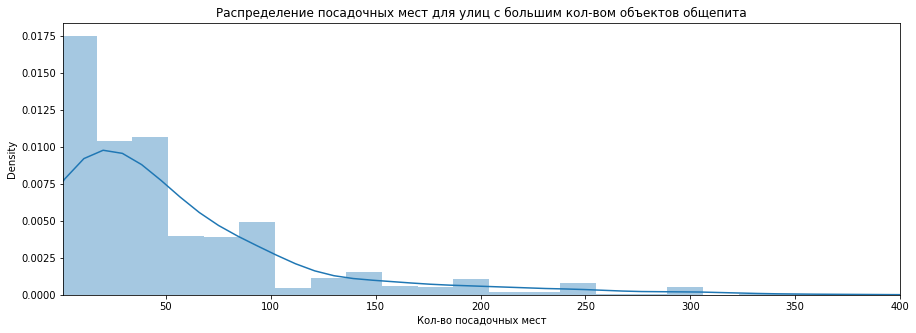

In [22]:
df_ratio_streets_number = df.query('street in @top_10')

plt.figure(figsize=(15, 5))
sns.distplot(df_ratio_streets_number['number'], bins=100) 
plt.title('Распределение посадочных мест для улиц с большим кол-вом объектов общепита')
plt.xlabel('Кол-во посадочных мест')    
plt.xlim (1, 400);

Если оценивать заведения, расположенные в пределах Топ-10 улиц, с точки зрения посадочных мест, то наиболее распространен вариант с кол-вом посадочных мест в пределах 100.

### Общий вывод 

**Подведем итоги:**

<font color='green'>1) наиболее распространенный вид объектов общественного питания - кафе (почти 40%)</font>

Также к числу наиболее распространенных видов объектов общественного питания можно отнести столовые (17%), рестораны (15%) и предприятия быстрого обслуживания (13%).
        
<font color='green'>2) наиболее популярны несетевые заведения (81%)</font>

Большая часть несетевых заведений приходится на кафе. Помимо этого, преимущественно к несетевым относятся столовые, буфеты, бары.

Если говорить про сетевые заведения, то это могут быть предприятия быстрого обслуживания, рестораны. Однако велика доля и сетевых кафе.

<font color='green'>3) по кол-ву посадочных мест лидером являются столовые: в среднем столовые могут одновременно разместить до 130 гостей</font>

На второе место вышли рестораны: здесь одновременно может находиться до 96 посетителей.

На третьем месте - буфет со своей способностью разместить 51 гостя.

Для кафе характерны небольшие размеры, следовательно, среднее кол-во посадочных мест не превышает 40.

<font color='green'>4) по территориальному признаку наиболее распространены заведения в пределах МКАДа</font>

Мы получили 11 районов Москвы, где расположено больше всего объектов общественного питания:

    Район Чертаново Центральное
    Донской район
    Ломоносовский район
    Район Проспект Вернадского
    Обручевский район
    Район Теплый Стан
    Район Нагатино-Садовники
    Район Чертаново Южное
    Район Тропарево-Никулино
    Район Гагаринский
    Район Чертаново Северное
Следует учесть, что в этих районах будет высока конкуренция.

Также мы получили 16 районов Москвы, где зарегистрировано больше всего единственных предприятий общепита на всю улицу:

    Таганский район
    Район Хамовники    
    Басманный район    
    Тверской район    
    Пресненский район    
    Район Марьина роща    
    Район Арбат    
    Мещанский район    
    Район Сокольники    
    Район Замоскворечье    
    Район Соколиная Гора    
    Район Лефортово    
    Даниловский район    
    Красносельский район    
    Район Богородское    
    Район Якиманка 
В данных районах конкуренция будет минимальной, но стоит также дополнительно учитывать проходимость в данных районах города.

**Рекомендации по формату заведения общественного питания:**

- По виду заведения: кафе
- По кол-ву посадочных мест: в пределах 50
- Территориально: Южный, Юго-Западный и Западный административный округ (при условии высокой конкуренции), либо Центральный административный округ (при условии низкой конкуренции, но требуется дополнительное исследование проходимости места)
- Возможность сети: формат кафе нашел широкое распространение среди сетевых заведений, однако целесообразнее будет развить сеть через некоторое время, когда головное заведение начнет окупаться

## Подготовка презентации

Подготовим презентацию исследования для инвесторов.

Презентация: https://drive.google.com/file/d/1gIdgc79bLK8qi0RwePGw4PaNooWJWZju/view?usp=sharing